In [8]:
import bz2
import _pickle as cPickle

In [9]:
COLAB = 'google.colab' in str(get_ipython())
COMPRESS = False

In [10]:
if COLAB:
  from google.colab import drive
  drive.mount('/content/drive')
  path = "/content/drive//MyDrive/DL4CV-2022/GTSRB/"
  !ls $path
else:
  path = "./data/"
  !ls $path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GTSRB-trainImages.pbz2	GTSRB-trainLabels.pbz2	Readme-Images.txt  Training


In [11]:
# trainImages, trainLabels = readTrafficSigns('GTSRB/Training')
# print len(trainLabels), len(trainImages)
# plt.imshow(trainImages[42])
# plt.show()

import csv
import matplotlib.pyplot as plt

# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.'''
    
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader)
        #gtReader.next() # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

# Pickle a file 
def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f: cPickle.dump(data, f)

# Load a compressed pickle file
def decompress_pickle(file):
  data = bz2.BZ2File(file, 'rb')
  data = cPickle.load(data)
  return data

In [12]:
if COMPRESS:
  pass
else:
  trainImages = decompress_pickle(path + 'GTSRB-trainImages.pbz2') 
  trainLabels = decompress_pickle(path + 'GTSRB-trainLabels.pbz2') 

In [13]:
print (len(trainLabels), len(trainImages))

39209 39209


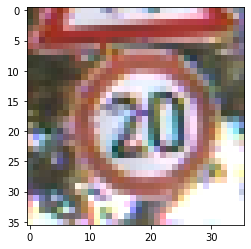

In [14]:
plt.imshow(trainImages[42])
plt.show()